# Lab 01 - Visualizing Tabular Data in Plotly

In this notebook, we will be learning how to translate some of the visualization techniques learned using `matplotlib` and translate that into the syntax of `plotly` in Python. This is in preparation for the creation of Plotly Dash applications later in the course.

First, let's ensure we have `plotly` installed. For more reference, check out the [Getting started with plotly in Python](https://plotly.com/python/getting-started/) page.

You may install `plotly` using `pip`
```
pip install plotly
```
or `conda`:
```
conda install -c conda-forge plotly
```

In [19]:
!pip install plotly
!pip install geopandas

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

from pathlib import Path

import plotly.express as px
import plotly.graph_objects as go

%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## Dataset
**Shape Files**
Interactive Map

**Dashboard Data**
Dashboard, Province, LGU
* For Pie Chart, Bar Chart etc.


When working on Google Colab, you can keep your datasets on your "My Drive" for easy access. Make sure to upload the dataset there.

In [21]:
# Note, we're using the 'latin-1' encoding because there may be some latin characters present in the dataset
# crashes = pd.read_csv(datasets_folder / 'Airplane_Crashes_and_Fatalities_Since_1908_t0_2023.csv', encoding='latin1')
# crashes.head()

p_shapes = gpd.read_file(r"C:\Users\acer\Downloads\PH_Adm2_ProvDists.shp")
p_shapes.head(3)

,adm1_psgc,adm2_psgc,adm2_en,geo_level,len_crs,area_crs,len_km,area_km2,geometry
0,100000000,102800000,Ilocos Norte,Prov,309785,3276945154,309,3276.0,"POLYGON ((285928.399 2055561.259, 285954.238 2..."
1,100000000,102900000,Ilocos Sur,Prov,452374,2467458323,452,2467.0,"MULTIPOLYGON (((242575.411 1968180.313, 242419..."
2,100000000,103300000,La Union,Prov,262415,1414080983,262,1414.0,"POLYGON ((240302.245 1844607.162, 239281.380 1..."


In [22]:
p_shapes

,adm1_psgc,adm2_psgc,adm2_en,geo_level,len_crs,area_crs,len_km,area_km2,geometry
0,100000000,102800000,Ilocos Norte,Prov,309785,3276945154,309,3276.0,"POLYGON ((285928.399 2055561.259, 285954.238 2..."
1,100000000,102900000,Ilocos Sur,Prov,452374,2467458323,452,2467.0,"MULTIPOLYGON (((242575.411 1968180.313, 242419..."
2,100000000,103300000,La Union,Prov,262415,1414080983,262,1414.0,"POLYGON ((240302.245 1844607.162, 239281.380 1..."
3,100000000,105500000,Pangasinan,Prov,789136,5161200257,789,5161.0,"MULTIPOLYGON (((171359.200 1820090.799, 171358..."
4,200000000,200900000,Batanes,Prov,230060,201280837,230,201.0,"MULTIPOLYGON (((390824.572 2333905.124, 390822..."
...,...,...,...,...,...,...,...,...,...
83,1900000000,1906600000,Sulu,Prov,2242590,1516335977,2242,1516.0,"MULTIPOLYGON (((245461.226 707396.353, 245457...."
84,1900000000,1907000000,Tawi-Tawi,Prov,1770217,1157107865,1770,1157.0,"MULTIPOLYGON (((-6170.646 795679.841, -6173.76..."
85,1900000000,1908700000,Maguindanao del Norte,Prov,459520,2550339819,459,2550.0,"MULTIPOLYGON (((660243.194 820832.066, 655972...."
86,1900000000,1908800000,Maguindanao del Sur,Prov,459919,2459987413,459,2459.0,"POLYGON ((689022.651 794303.039, 689932.162 79..."


In [23]:
p_shapes.shape

(88, 9)

### Province Distance


In [24]:
dataset_folder = Path('Datasets/Province_Data')
p_score = pd.read_csv(dataset_folder / 'Overall Score.csv', encoding='latin1')
p_score

,PROVINCE / LGU,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Abra,-,-,-,32.7821,36.9982,33.7983,34.9105,32.5359,25.4537,27.6938
1,Agusan Del Norte,-,35.7021,25.4543,35.1706,35.8843,36.7612,36.2011,33.3630,29.1799,29.3118
2,Agusan Del Sur,-,29.6676,23.0571,34.4961,35.5334,36.0726,37.9942,33.4347,29.3079,30.9635
3,Aklan,-,-,27.8863,30.8101,37.7534,38.8364,39.6627,33.7119,30.7996,32.9665
4,Albay,-,29.1723,26.0992,34.1125,36.8063,38.6022,42.1993,34.4860,32.6410,35.4027
...,...,...,...,...,...,...,...,...,...,...,...
79,Zambales,-,29.6540,16.9759,25.7157,34.5998,36.9618,38.0738,32.0445,29.0407,31.2143
80,Zamboanga City,-,-,-,-,-,-,-,-,-,-
81,Zamboanga Del Norte,-,27.9431,23.3647,29.5354,32.1167,33.9389,37.0211,33.7801,28.8895,28.6283
82,Zamboanga Del Sur,-,35.8866,21.5303,29.2613,32.2613,35.6177,38.1755,33.6485,29.2569,30.8735


In [54]:
p_shapes.loc[p_shapes['adm2_en'] == 'Agusan del Norte', 'adm2_en'] = 'Agusan Del Norte'
p_shapes.loc[p_shapes['adm2_en'] == 'Agusan del Sur', 'adm2_en'] = 'Agusan Del Sur'
p_shapes.loc[p_shapes['adm2_en'] == 'Batangas', 'adm2_en'] = 'Batangas Province'
p_shapes.loc[p_shapes['adm2_en'] == 'Biliran', 'adm2_en'] = 'Biliran Province'
p_shapes.loc[p_shapes['adm2_en'] == 'Cavite', 'adm2_en'] = 'Cavite Province'
p_shapes.loc[p_shapes['adm2_en'] == 'Cebu', 'adm2_en'] = 'Cebu Province'
p_shapes.loc[p_shapes['adm2_en'] == 'Cotabato', 'adm2_en'] = 'Cotabato (North Cotabato)'
p_shapes.loc[p_shapes['adm2_en'] == 'Davao de Oro', 'adm2_en'] = 'Davao De Oro'
p_shapes.loc[p_shapes['adm2_en'] == 'Davao del Norte', 'adm2_en'] = 'Davao Del Norte'
p_shapes.loc[p_shapes['adm2_en'] == 'Davao del Sur', 'adm2_en'] = 'Davao Del Sur'
p_shapes.loc[p_shapes['adm2_en'] == 'Iloilo', 'adm2_en'] = 'Iloilo Province'
p_shapes.loc[p_shapes['adm2_en'] == 'Lanao del Norte', 'adm2_en'] = 'Lanao Del Norte'
p_shapes.loc[p_shapes['adm2_en'] == 'Lanao del Sur', 'adm2_en'] = 'Lanao Del Sur'
p_shapes.loc[p_shapes['adm2_en'] == 'Leyte', 'adm2_en'] = 'Leyte Province'
p_shapes.loc[p_shapes['adm2_en'] == 'Masbate', 'adm2_en'] = 'Masbate Province'
p_shapes.loc[p_shapes['adm2_en'] == 'Romblon', 'adm2_en'] = 'Romblon Province'
p_shapes.loc[p_shapes['adm2_en'] == 'Samar', 'adm2_en'] = 'Samar (Western Samar)'
p_shapes.loc[p_shapes['adm2_en'] == 'Siquijor', 'adm2_en'] = 'Siquijor Province'
p_shapes.loc[p_shapes['adm2_en'] == 'Sorsogon', 'adm2_en'] = 'Sorsogon Province'
p_shapes.loc[p_shapes['adm2_en'] == 'Surigao del Norte', 'adm2_en'] = 'Surigao Del Norte'
p_shapes.loc[p_shapes['adm2_en'] == 'Surigao del Sur', 'adm2_en'] = 'Surigao Del Sur'
p_shapes.loc[p_shapes['adm2_en'] == 'Tarlac', 'adm2_en'] = 'Tarlac Province'
p_shapes.loc[p_shapes['adm2_en'] == 'Zamboanga del Norte', 'adm2_en'] = 'Zamboanga Del Norte'
p_shapes.loc[p_shapes['adm2_en'] == 'Zamboanga del Sur', 'adm2_en'] = 'Zamboanga Del Sur'
p_choro = pd.merge(p_shapes, p_score,  left_on='adm2_en', right_on='PROVINCE / LGU', how='left', indicator=True)
#Issues on City of Isabela, Maguindanao del Norte and Maguindanao
#Change the color of Metro Manila

#Code to test which are not included
#test = p_choro[p_choro['_merge'] == 'left_only'].sort_values('adm2_en').reset_index()
#test

,index,adm1_psgc,adm2_psgc,adm2_en,geo_level,len_crs,area_crs,len_km,area_km2,geometry,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,_merge
0,46,900000000,990100000,City of Isabela (Not a Province),None,136093,219762040,136,219.0,"MULTIPOLYGON (((388524.379 745811.202, 388525....",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
1,85,1900000000,1908700000,Maguindanao del Norte,Prov,459520,2550339819,459,2550.0,"MULTIPOLYGON (((660243.194 820832.066, 655972....",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
2,86,1900000000,1908800000,Maguindanao del Sur,Prov,459919,2459987413,459,2459.0,"POLYGON ((689022.651 794303.039, 689932.162 79...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
3,61,1300000000,1303900000,"NCR, City of Manila, First District (Not a Pro...",Dist,65456,41975413,65,41.0,"POLYGON ((283722.929 1619082.846, 283722.033 1...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
4,64,1300000000,1307600000,"NCR, Fourth District (Not a Province)",Dist,102146,196785340,102,196.0,"POLYGON ((295625.087 1607412.928, 295678.701 1...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
5,62,1300000000,1307400000,"NCR, Second District (Not a Province)",Dist,103620,233830886,103,233.0,"POLYGON ((295625.087 1607412.928, 295602.871 1...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
6,63,1300000000,1307500000,"NCR, Third District (Not a Province)",Dist,103619,126134749,103,126.0,"POLYGON ((295432.405 1633664.936, 295432.256 1...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
7,87,1900000000,1909900000,None,None,445919,542850232,445,542.0,"MULTIPOLYGON (((655158.797 814144.704, 655972....",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [55]:
p_score
p_shapes

,adm1_psgc,adm2_psgc,adm2_en,geo_level,len_crs,area_crs,len_km,area_km2,geometry
0,100000000,102800000,Ilocos Norte,Prov,309785,3276945154,309,3276.0,"POLYGON ((285928.399 2055561.259, 285954.238 2..."
1,100000000,102900000,Ilocos Sur,Prov,452374,2467458323,452,2467.0,"MULTIPOLYGON (((242575.411 1968180.313, 242419..."
2,100000000,103300000,La Union,Prov,262415,1414080983,262,1414.0,"POLYGON ((240302.245 1844607.162, 239281.380 1..."
3,100000000,105500000,Pangasinan,Prov,789136,5161200257,789,5161.0,"MULTIPOLYGON (((171359.200 1820090.799, 171358..."
4,200000000,200900000,Batanes,Prov,230060,201280837,230,201.0,"MULTIPOLYGON (((390824.572 2333905.124, 390822..."
...,...,...,...,...,...,...,...,...,...
83,1900000000,1906600000,Sulu,Prov,2242590,1516335977,2242,1516.0,"MULTIPOLYGON (((245461.226 707396.353, 245457...."
84,1900000000,1907000000,Tawi-Tawi,Prov,1770217,1157107865,1770,1157.0,"MULTIPOLYGON (((-6170.646 795679.841, -6173.76..."
85,1900000000,1908700000,Maguindanao del Norte,Prov,459520,2550339819,459,2550.0,"MULTIPOLYGON (((660243.194 820832.066, 655972...."
86,1900000000,1908800000,Maguindanao del Sur,Prov,459919,2459987413,459,2459.0,"POLYGON ((689022.651 794303.039, 689932.162 79..."


In [56]:
#Code to test which are not included
p_right = pd.merge(p_score, p_shapes, left_on='PROVINCE / LGU', right_on='adm2_en', how='left', indicator=True)
p_right
only_in_score_right = p_right[p_right['_merge'] == 'left_only'].reset_index()
only_in_score_right

,index,PROVINCE / LGU,2014,2015,2016,2017,2018,2019,2020,2021,...,adm1_psgc,adm2_psgc,adm2_en,geo_level,len_crs,area_crs,len_km,area_km2,geometry,_merge
0,9,Basilan (IX),-,-,-,-,-,-,-,-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,left_only
1,46,Maguindanao,-,-,-,-,-,-,-,33.3050,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,left_only
2,49,Metro Manila,-,-,-,-,-,-,-,-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,left_only
3,80,Zamboanga City,-,-,-,-,-,-,-,-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,left_only


<Axes: >

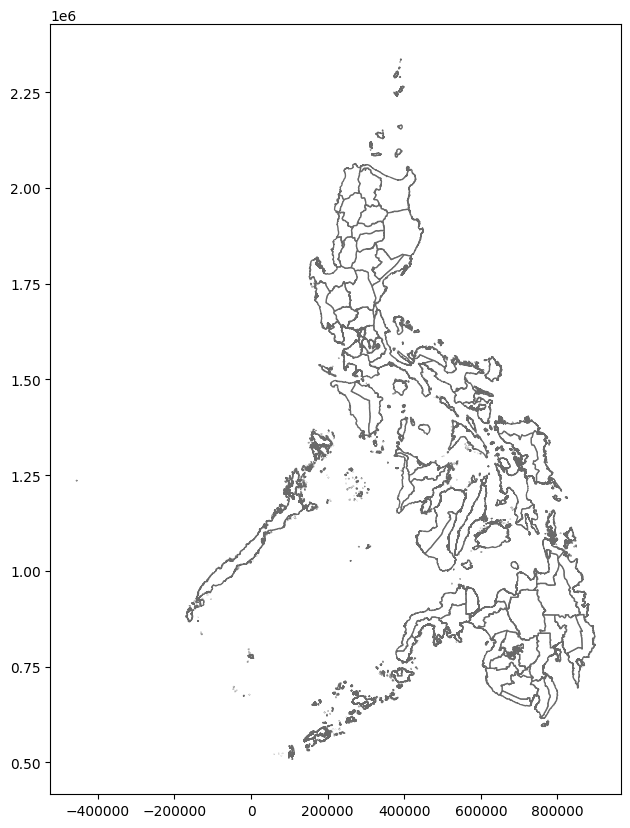

In [ ]:
p_shapes.plot(figsize=(15, 10), color='white', edgecolor='dimgray')

In [57]:
# check

p_choro_select = p_choro[['adm2_en', '2023']].copy()
styled_df = p_choro_select.style.set_properties(**{'text-align': 'left', 'font-size': '12pt'}) \
    .set_table_styles([{'selector': 'th', 'props': [('text-align', 'center'), ('font-size', '14pt')]}]) \
    .set_table_attributes('style="width: 50%;"')

# Display the styled DataFrame
styled_df

,adm2_en,2023
0,Ilocos Norte,33.3932
1,Ilocos Sur,31.7192
2,La Union,36.3735
3,Pangasinan,32.4118
4,Batanes,27.6319
5,Cagayan,34.1063
6,Isabela,32.8183
7,Nueva Vizcaya,30.1128
8,Quirino,31.4457
9,Bataan,35.1663


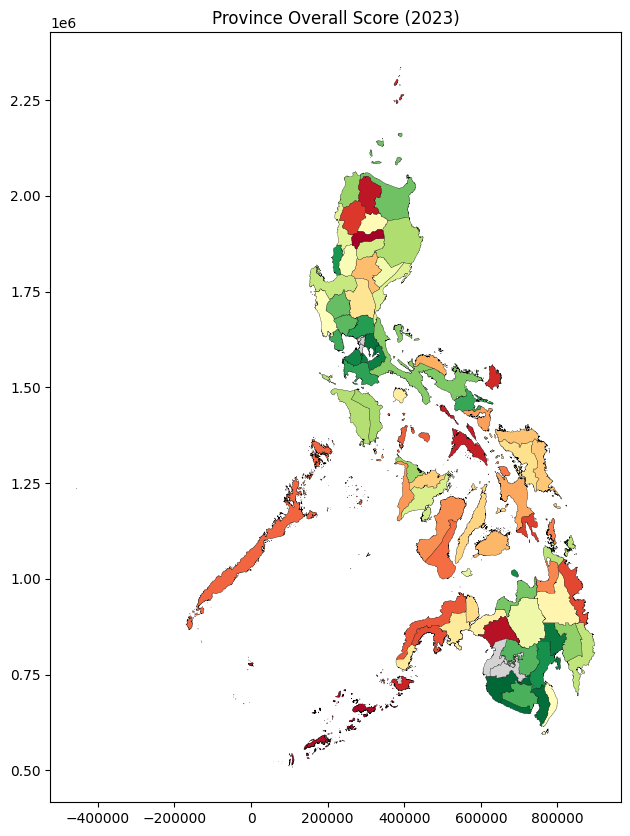

In [58]:
column_name = '2023'
p_choro.plot(figsize=(18,10),
             column=column_name,
             cmap='RdYlGn',
             missing_kwds = {'color': 'lightgray', 'edgecolor': 'black'},
             edgecolor='black',
             linewidth=0.2)
plt.title(f'Province Overall Score ({column_name})');

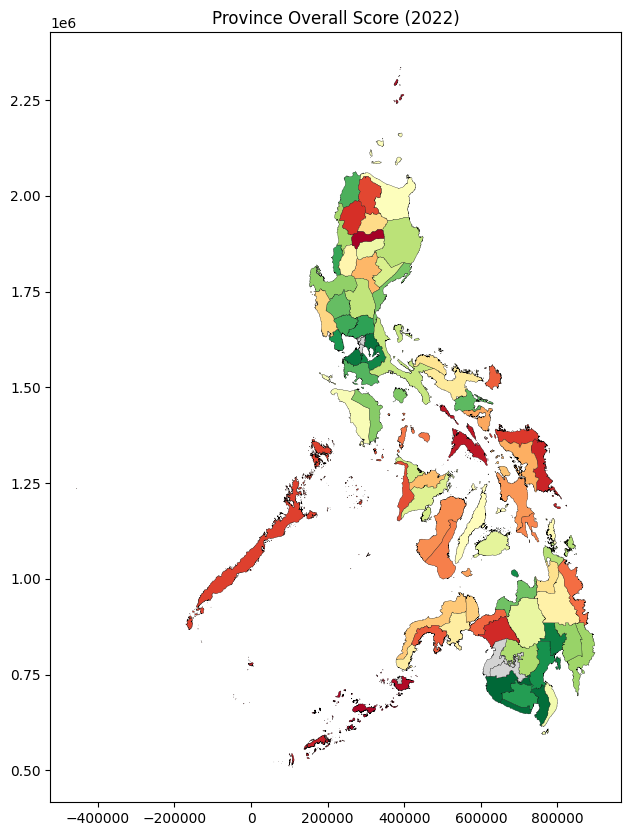

In [59]:
column_name = '2022'
p_choro.plot(figsize=(18,10),
             column=column_name,
             cmap='RdYlGn',
             missing_kwds = {'color': 'lightgray', 'edgecolor': 'black'},
             edgecolor='black',
             linewidth=0.2)
plt.title(f'Province Overall Score ({column_name})');

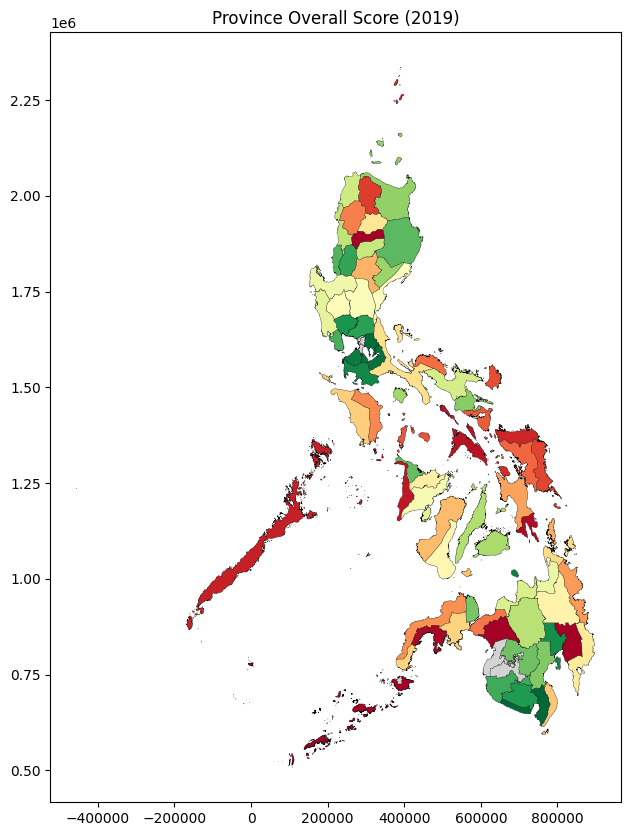

In [62]:
column_name = '2019'
p_choro.plot(figsize=(18,10),
             column=column_name,
             cmap='RdYlGn',
             missing_kwds = {'color': 'lightgray', 'edgecolor': 'black'},
             edgecolor='black',
             linewidth=0.2)
plt.title(f'Province Overall Score ({column_name})');
